**Ana Carla Guerra de Albuquerque Melo**

## O que vamos fazer?


1.   Escolher uma coluna para classificação.
2.   Separar os dados em Treino, Teste e Validação.
3.   Selecionar 4 algoritmos de classificação.
4.   Adicionar MLFlow no treinamento do modelo para rastreamento.
5.   Executar uma ferramenta de seleção de hiper-parâmetros sobre o conjunto de validação. (Selecionar no máximo 3 hiper-parâmetros, Selecionar o modelo com melhor resultado na métrica de avaliação)
6.   Realizar o diagnóstico do melhor modelo da etapa 5 e melhorá-lo.
7.   Bônus.




Essa é a segunda etapa do Projeto da Cadeira de Ciência de Dados, na qual agora será feita uma tarefa de classificação do Dataset dos pinguins.

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Vamos descartar a coluna "year", pois ela não será um fator determinante para a classificação.

Além disso, vamos deletar todas as linhas que possuem algum valor nulo na coluna sex.

In [60]:
penguins = penguins.drop(["year"], axis = 1)
penguins = penguins.dropna(subset = ["sex"])

Podemos ver que agora não há mais nenhum valor ausente em nenhuma coluna.

In [61]:
print(penguins.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Após isso, nosso dataset será composto por 333 linhas e 7 colunas.

In [62]:
penguins.shape
print("Número de linhas:", penguins.shape[0])
print("Número de colunas:", penguins.shape[1])

Número de linhas: 333
Número de colunas: 7


Vamos plotar alguns gráficos antes para relembrar como as features se relacionam.

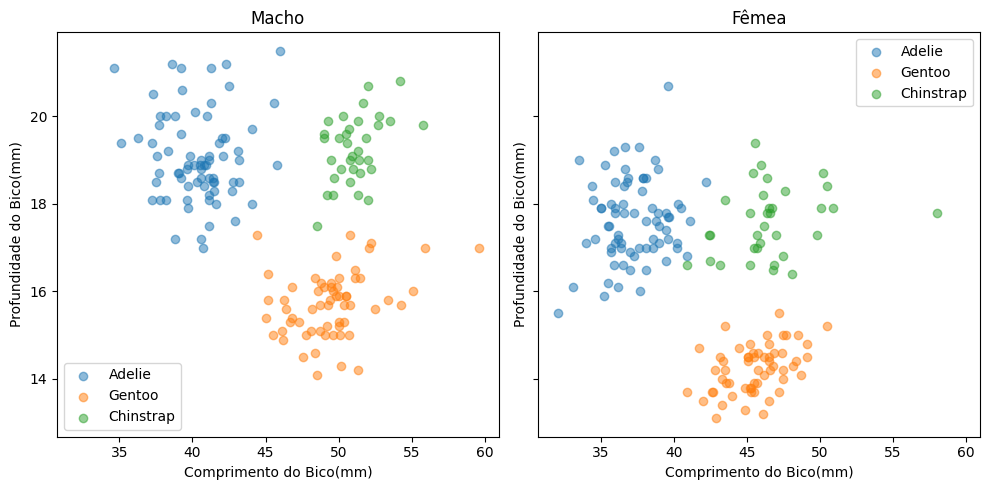

In [63]:
species = penguins['species'].unique()

fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharex = True, sharey = True)

for penguin in species:
    male_mask = (penguins["species"] == penguin) & (penguins["sex"] == "male")
    female_mask = (penguins["species"] == penguin) & (penguins["sex"] == "female")

    ax[0].scatter(penguins[male_mask]["bill_length_mm"],
                  penguins[male_mask]["bill_depth_mm"],
                  label = penguin,
                  alpha = 0.5)

    ax[1].scatter(penguins[female_mask]["bill_length_mm"],
                  penguins[female_mask]["bill_depth_mm"],
                  label = penguin,
                  alpha = 0.5)

ax[0].set(title = "Macho",
          xlabel = "Comprimento do Bico(mm)",
          ylabel = "Profundidade do Bico(mm)")
ax[1].set(title = "Fêmea",
          xlabel = "Comprimento do Bico(mm)",
          ylabel = "Profundidade do Bico(mm)")

ax[0].legend(), ax[1].legend()
plt.tight_layout()

Podemos concluir a partir da formação de clusters do gráfico plotado que o Comprimento e a Profundidade do bico são bons indicadores para separar as espécies de pinguins. Além disso, com os gráficos separados por sexo, fica ainda mais claro a diferença entre as espécies. Dessa forma, a delimitação precisa facilitará uma boa classificação.

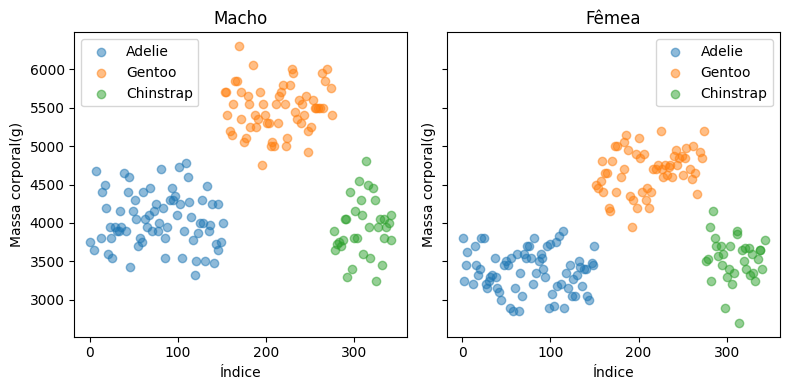

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

for penguin in species:
    male_mask = (penguins["species"] == penguin) & (penguins["sex"] == "male")
    female_mask = (penguins["species"] == penguin) & (penguins["sex"] == "female")

    ax[0].scatter(penguins[male_mask].index, penguins[male_mask]["body_mass_g"],
                  label=penguin,
                  alpha=0.5)

    ax[1].scatter(penguins[female_mask].index, penguins[female_mask]["body_mass_g"],
                  label=penguin,
                  alpha=0.5)

ax[0].set(title="Macho",
          xlabel="ìndice",
          ylabel="Massa corporal(g)")
ax[1].set(title="Fêmea",
          xlabel="ìndice",
          ylabel="Massa corporal(g)")

ax[0].legend(), ax[1].legend()
plt.tight_layout()
plt.show()


Nesse gráfico vemos que a massa corporal também mantém uma boa delimitação. Para ambos, os pinguins Gentoo têm valores muito maiores, quase completamente diferentes das outras duas espécies.


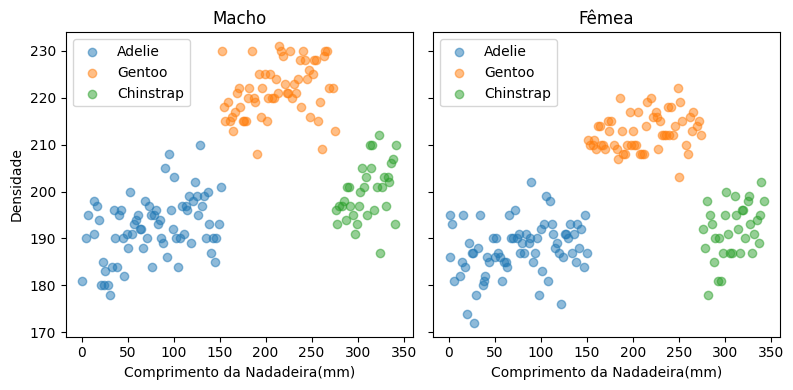

In [65]:
#Create figure of 2 subplots, each of which share the same x and y axes
fig, ax = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)

#Loop through species
for penguin in species:
    #Create a mask for male penguin
    male_mask = (penguins["species"] == penguin) & (penguins["sex"] == "male")

    #Create a mask for female penguin
    female_mask = (penguins["species"] == penguin) & (penguins["sex"] == "female")

    #Histogram of male Flipper Length
    ax[0].scatter(penguins[male_mask].index, penguins[male_mask]["flipper_length_mm"],
            label = penguin,
            alpha = 0.5)

    #Histogram of female Flipper Length
    ax[1].scatter(penguins[female_mask].index, penguins[female_mask]["flipper_length_mm"],
            label = penguin,
            alpha = 0.5)

#Set titles, xlabels, and ylabel
ax[0].set(title = "Macho",
          xlabel = "Comprimento da Nadadeira(mm)",
          ylabel = "Densidade")
ax[1].set(title = "Fêmea",
          xlabel = "Comprimento da Nadadeira(mm)",)

#Display legends and use tight_layout
ax[0].legend(), ax[1].legend()
plt.tight_layout()

Com esse Cluster, percebemos então que tanto a massa corporal quanto o comprimento da nadadeira, as fêmeas de todas as três espécies têm valores menores. E assim, concluimos que saber o sexo pode permitir uma estimativa de classificação mais eficaz das espécies.

# Classificação


In [66]:
from sklearn import preprocessing

def prep_penguins_data(data):

    df = data.copy()

    le = preprocessing.LabelEncoder()

    df["sex"] = le.fit_transform(df["sex"])

    df["island"] = le.fit_transform(df["island"])

    df["species"] = le.fit_transform(df["species"])

    X = df.drop(["species"], axis = 1)

    y = df["species"]
    return X,y

In [67]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(penguins, test_size=0.3, random_state=42)

train, validation = train_test_split(train, test_size=0.3, random_state=42)

X_train, y_train = prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)
X_val, y_val = prep_penguins_data(validation)

Regressão Logística

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)

Yhat_lr = lr.predict(X_test)

In [69]:
lr.score(X_test, y_test)

0.97

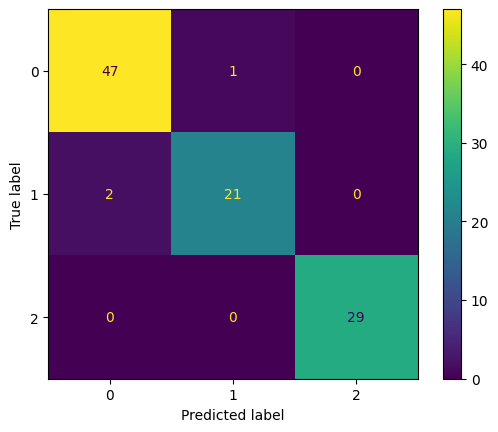

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, Yhat_lr, labels=lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)


disp.plot()

plt.show()

Com o modelo de Regressão Logística, vemos que foi possível obter uma boa acurácia e a matriz de confusão revela que a grande maioria das espécies está sendo bem classificada e que a maioria das labels preditas estão sendo classificadas para suas respectivas labels verdadeiras.

Árvore de Decisão

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 30)

dt.fit(X_train, y_train)

Yhat_dt = dt.predict(X_test)

In [72]:
dt.score(X_test, y_test)

0.91

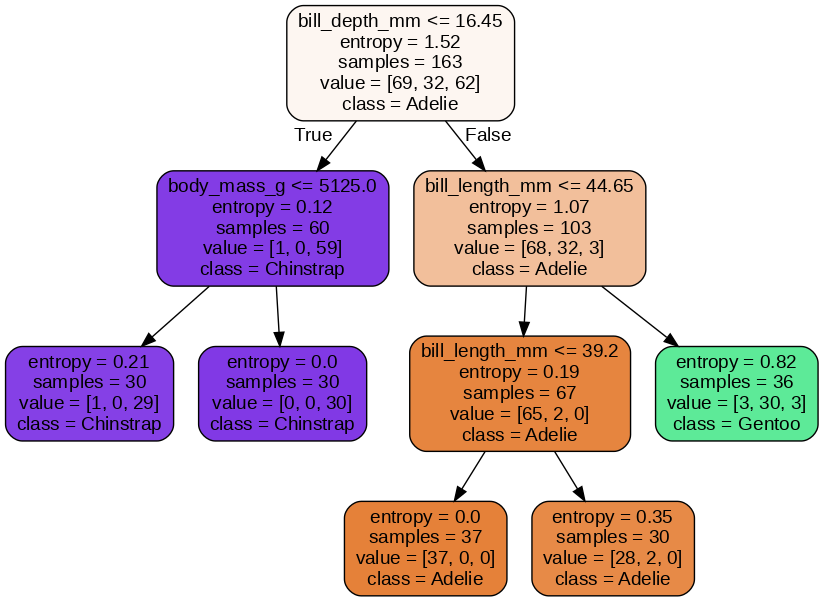

In [73]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree.dot',
                feature_names = X_train.columns,
                class_names = list(species),
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'])

from IPython.display import Image
Image(filename = 'tree.png')

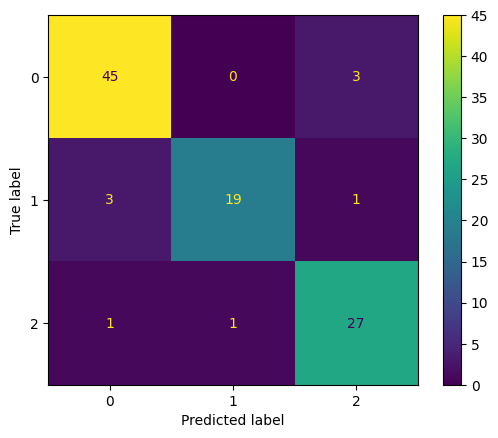

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, Yhat_dt, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()

plt.show()

Com o modelo de Árvores de Decisão, vemos que foi possível obter uma boa acurácia, porém menor do que o modelo anterior e a matriz de confusão revela que a grande maioria das espécies está sendo bem classificada, apesar de alguns labels estarem classificadas de forma errada, ainda é um número relativamente baixo de erros. Além disso, com o plot da árvore de decisão é possível entender melhor quais os passos o modelo considerou até um possível resultado.

SVM

In [75]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

clf.fit(X_train, y_train)


Yhat_clf = clf.predict(X_test)

In [76]:
clf.score(X_test, y_test)

0.99

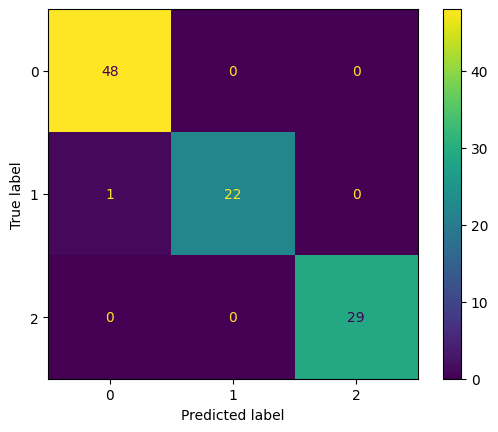

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, Yhat_clf, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)


disp.plot()

plt.show()

Com o modelo de Support Vector Machine, vemos que foi possível obter uma boa acurácia, mas que seu número muito alto indique overfitting. A matriz de confusão revela que a grande maioria das espécies está sendo bem classificada, com apenas 1 espécie sendo classificada errada.

Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

Yhat_gnb = gnb.predict(X_test)


In [79]:
gnb.score(X_test, y_test)

0.97

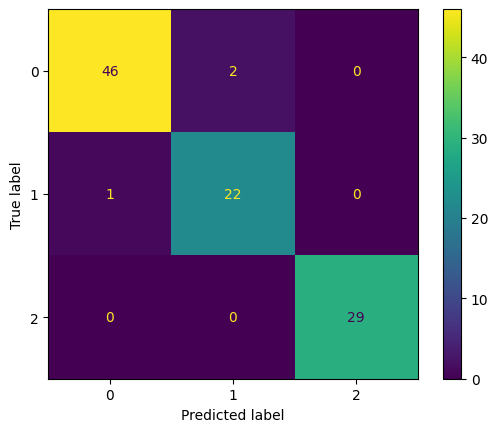

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, Yhat_gnb, labels=gnb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)


disp.plot()

plt.show()

Com o modelo de Naive Bayes, vemos que foi possível obter uma boa acurácia e a matriz de confusão revela que a grande maioria das espécies está sendo bem classificada e com poucas espécies sendo classificadas errada.

Analisando a Peformance Geral

In [81]:
from sklearn.metrics import accuracy_score

metrics = pd.DataFrame(index = ['lr','dt', 'clf','gnb'], columns = ['Acc'])

metrics.at['lr','Acc'] = accuracy_score(y_test,Yhat_lr)
metrics.at['dt','Acc'] = accuracy_score(y_test,Yhat_dt)
metrics.at['clf','Acc'] = accuracy_score(y_test,Yhat_clf)
metrics.at['gnb','Acc'] = accuracy_score(y_test,Yhat_gnb)

metrics

,Acc
lr,0.97
dt,0.91
clf,0.99
gnb,0.97


Analisando de forma geral, vemos que todos os modelos obtiveram uma boa acurácia, mas é importante notar que uma acurácia de treino de 99% pode ser um indicador de overfitting.

# Adicionando MLFlow aos treinamentos

In [82]:
pip install mlflow

In [83]:
import os
import warnings
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [84]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred, average='weighted')
    recall = recall_score(actual, pred, average='weighted')
    f1 = f1_score(actual, pred, average='weighted')
    return accuracy, precision, recall, f1

Para cada modelo usado na etapa de classificação, foi usado o GridSearch para estudar e definir os melhores hiperparâmetros, no qual foi definido a grade de parâmetros, foi criado o pipeline do modelo, foi feita o treinamento comGridSearch, obtendo o resultado e registrando no MLFlow.

**Treinamento com Regressão Logística**

In [85]:
def train_and_log_model(train_x, train_y):
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    param_grid = {
        'logisticregression__C': [0.1, 1.0, 10.0],
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__solver': ['liblinear', 'saga']
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logisticregression', LogisticRegression(max_iter=1000, random_state=42))
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

    with mlflow.start_run():
        grid_search.fit(train_x, train_y)

        best_model = grid_search.best_estimator_


        mlflow.log_param("C", best_model.named_steps['logisticregression'].C)
        mlflow.log_param("penalty", best_model.named_steps['logisticregression'].penalty)
        mlflow.log_param("solver", best_model.named_steps['logisticregression'].solver)
        mlflow.sklearn.log_model(best_model, "logistic_regression_model")

    print("Melhor Modelo selecionado pelo GridSearch:")
    print(best_model)

    print("\nMelhores parâmetros selecionados pelo GridSearch:")
    print(grid_search.best_params_)

    print(f"\nMelhor acurácia obtida pelo GridSearch: {grid_search.best_score_}")

    results = pd.DataFrame(grid_search.cv_results_)

    heatmap_data = results.groupby(['param_logisticregression__C', 'param_logisticregression__penalty'])['mean_test_score'].mean().unstack()

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True)
    plt.xlabel('Penalty')
    plt.ylabel('C')
    plt.title('Heatmap de resultados do GridSearch')
    plt.show()

    return best_model

Best model found by GridSearchCV:
Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Best parameters found by GridSearchCV:
{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}

Best accuracy score from GridSearchCV: 0.99375


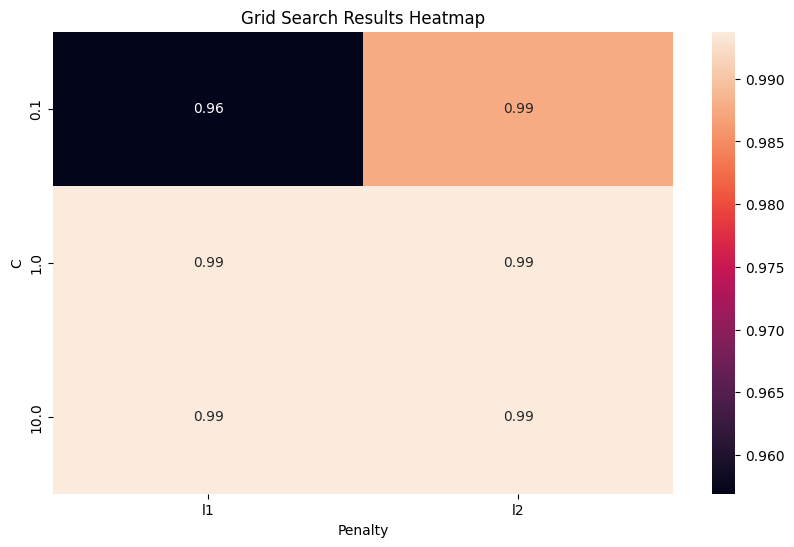

In [86]:
best_model = train_and_log_model(X_train, y_train)

Com o GridSearch obtivemos a melhor acurácia, os melhores parâmetros para o modelo e o Heatmap que permite a visualização da performance da combinação de cada parâmetro. Vemos que todas as combinações de 2 dos 3 parâmetros usados tiveram alta performance, sendo a menor delas entre C=0.1 e Penalty=l1.

In [87]:
predicted_classes = best_model.predict(X_test)
(accuracy, precision, recall, f1) = eval_metrics(y_test, predicted_classes)

print(f"Logistic Regression model (C={best_model.named_steps['logisticregression'].C}, "
      f"penalty={best_model.named_steps['logisticregression'].penalty}, "
      f"solver={best_model.named_steps['logisticregression'].solver}):")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}")

Logistic Regression model (C=1.0, penalty=l1, solver=liblinear):
  Accuracy: 0.99
  Precision: 0.990204081632653
  Recall: 0.99
  F1 Score: 0.9899404352806414


Esses são os resultados da aplicação dos melhores parâmetros na etapa de teste. Vemos que o modelo se comportou bem, com alta generalização do conjunto de dados fora do treinamento.

**Treinando com Àrvores de Decisão**

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [89]:
def train_and_log_model(train_x, train_y):
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    param_grid = {
        'decisiontreeclassifier__criterion': ['gini', 'entropy'],
        'decisiontreeclassifier__max_depth': [3, 5, 7],
        'decisiontreeclassifier__min_samples_leaf': [10, 20, 30]
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

    with mlflow.start_run():
        grid_search.fit(train_x, train_y)

        best_model = grid_search.best_estimator_

        mlflow.log_param("criterion", best_model.named_steps['decisiontreeclassifier'].criterion)
        mlflow.log_param("max_depth", best_model.named_steps['decisiontreeclassifier'].max_depth)
        mlflow.log_param("min_samples_leaf", best_model.named_steps['decisiontreeclassifier'].min_samples_leaf)
        mlflow.sklearn.log_model(best_model, "decision_tree_classifier_model")

    print("Melhor Modelo selecionado pelo GridSearch:")
    print(best_model)

    print("\nMelhores parâmetros selecionados pelo GridSearch:")
    print(grid_search.best_params_)

    print(f"\nMelhor acurácia obtida pelo GridSearch: {grid_search.best_score_}")

    results = pd.DataFrame(grid_search.cv_results_)

    heatmap_data = results.groupby(['param_decisiontreeclassifier__criterion', 'param_decisiontreeclassifier__max_depth'])['mean_test_score'].mean().unstack()

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True)
    plt.xlabel('Max Depth')
    plt.ylabel('Criterion')
    plt.title('Grid Search Results Heatmap - Decision Tree Classifier')
    plt.show()

    return best_model

Best model found by GridSearchCV:
Pipeline(steps=[('scaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=10,
                                        random_state=42))])

Best parameters found by GridSearchCV:
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 10}

Best accuracy score from GridSearchCV: 0.9196969696969697


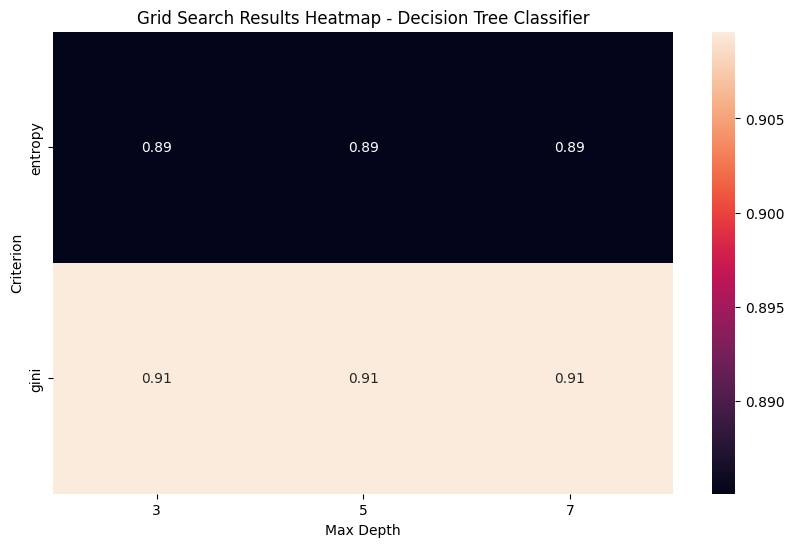

In [90]:
best_model = train_and_log_model(X_train, y_train)

Com o GridSearch obtivemos a melhor acurácia, os melhores parâmetros para o modelo e o Heatmap que permite a visualização da performance da combinação de cada parâmetro. Vemos que todas as combinações de 2 dos 3 parâmetros usados tiveram alta performance, sendo a menor delas com o uso de Criterion=Entropy.

In [91]:
predicted_classes = best_model.predict(X_test)
(accuracy, precision, recall, f1) = eval_metrics(y_test, predicted_classes)

print(f"Decision Tree Classifier (criterion={best_model.named_steps['decisiontreeclassifier'].criterion}, "
      f"max_depth={best_model.named_steps['decisiontreeclassifier'].max_depth}, "
      f"min_samples_leaf={best_model.named_steps['decisiontreeclassifier'].min_samples_leaf}):")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}")

Decision Tree Classifier (criterion=gini, max_depth=3, min_samples_leaf=10):
  Accuracy: 0.96
  Precision: 0.9620980392156863
  Recall: 0.96
  F1 Score: 0.9586345293124954


Esses são os resultados da aplicação dos melhores parâmetros na etapa de teste. Vemos que o modelo se comportou bem, com alta generalização do conjunto de dados fora do treinamento.

**Treinamento com SVM**

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [93]:
def train_and_log_model_svm(train_x, train_y):
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    param_grid = {
        'svc__C': [0.1, 1.0, 10.0],
        'svc__kernel': ['linear', 'rbf', 'poly'],
        'svc__gamma': ['scale', 'auto']
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True, random_state=42))
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

    with mlflow.start_run():

        grid_search.fit(train_x, train_y)

        best_model = grid_search.best_estimator_

        mlflow.log_param("C", best_model.named_steps['svc'].C)
        mlflow.log_param("kernel", best_model.named_steps['svc'].kernel)
        mlflow.log_param("gamma", best_model.named_steps['svc'].gamma)
        mlflow.sklearn.log_model(best_model, "svm_model")

    print("Melhor Modelo selecionado pelo GridSearch:")
    print(best_model)

    print("\nMelhores parâmetros selecionados pelo GridSearch:")
    print(grid_search.best_params_)

    print(f"\nMelhor acurácia obtida pelo GridSearch: {grid_search.best_score_}")

    results = pd.DataFrame(grid_search.cv_results_)

    heatmap_data = results.groupby(['param_svc__C', 'param_svc__kernel'])['mean_test_score'].mean().unstack()

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True)
    plt.xlabel('Kernel')
    plt.ylabel('C')
    plt.title('Grid Search Results Heatmap - SVM')
    plt.show()

    return best_model

Best model found by GridSearchCV:
Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(kernel='poly', probability=True, random_state=42))])

Best parameters found by GridSearchCV:
{'svc__C': 1.0, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

Best accuracy score from GridSearchCV: 0.9939393939393939


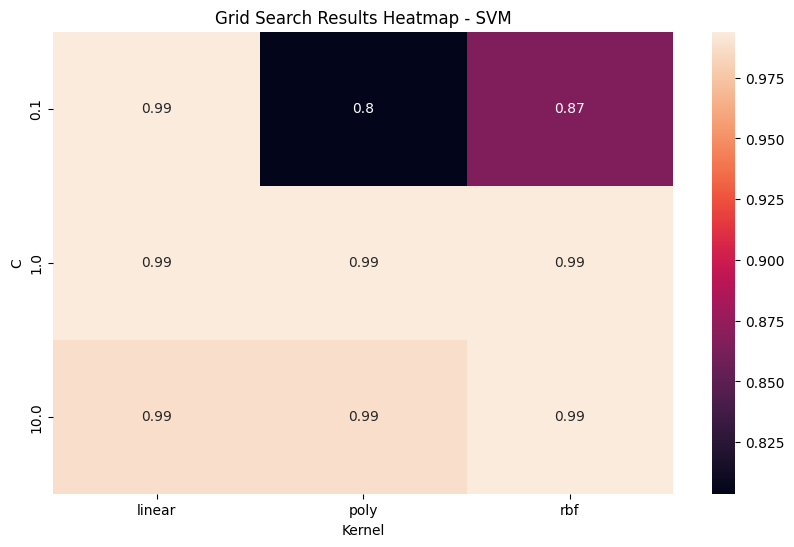

In [94]:
best_model_svm = train_and_log_model_svm(X_train, y_train)

Com o GridSearch obtivemos a melhor acurácia, os melhores parâmetros para o modelo e o Heatmap que permite a visualização da performance da combinação de cada parâmetro. Vemos que a maioria das combinações de 2 dos 3 parâmetros usados tiveram alta performance, sendo a menor delas entre C=0.1 e Kernel=poly.

In [95]:
predicted_classes_svm = best_model_svm.predict(X_test)
(accuracy_svm, precision_svm, recall_svm, f1_svm) = eval_metrics(y_test, predicted_classes_svm)

print(f"SVM Classifier (C={best_model_svm.named_steps['svc'].C}, "
      f"kernel={best_model_svm.named_steps['svc'].kernel}, "
      f"gamma={best_model_svm.named_steps['svc'].gamma}):")
print(f"  Accuracy: {accuracy_svm}")
print(f"  Precision: {precision_svm}")
print(f"  Recall: {recall_svm}")
print(f"  F1 Score: {f1_svm}")

SVM Classifier (C=1.0, kernel=poly, gamma=scale):
  Accuracy: 0.99
  Precision: 0.9904166666666667
  Recall: 0.99
  F1 Score: 0.9900537513997761


Esses são os resultados da aplicação dos melhores parâmetros na etapa de teste. Vemos que o modelo se comportou bem, com alta generalização do conjunto de dados fora do treinamento.

**Treinamento com Naive Bayes**

In [96]:
def train_and_log_model_nb(train_x, train_y):
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    param_grid = {
        'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gaussiannb', GaussianNB())
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

    with mlflow.start_run():
        grid_search.fit(train_x, train_y)

        best_model = grid_search.best_estimator_

        mlflow.log_param("var_smoothing", best_model.named_steps['gaussiannb'].var_smoothing)
        mlflow.sklearn.log_model(best_model, "gaussian_nb_model")

    print("Melhor Modelo selecionado pelo GridSearch:")
    print(best_model)

    print("\nMelhores parâmetros selecionados pelo GridSearch:")
    print(grid_search.best_params_)

    print(f"\nMelhor acurácia obtida pelo GridSearch: {grid_search.best_score_}")

    results = pd.DataFrame(grid_search.cv_results_)

    plt.figure(figsize=(10, 6))
    plt.semilogx(results['param_gaussiannb__var_smoothing'], results['mean_test_score'], marker='o', linestyle='-', color='b')
    plt.xlabel('Var_smoothing')
    plt.ylabel('Mean Accuracy')
    plt.title('Grid Search Results - Gaussian Naive Bayes')
    plt.grid(True)
    plt.show()

    return best_model

Best model found by GridSearchCV:
Pipeline(steps=[('scaler', StandardScaler()),
                ('gaussiannb', GaussianNB(var_smoothing=0.533669923120631))])

Best parameters found by GridSearchCV:
{'gaussiannb__var_smoothing': 0.533669923120631}

Best accuracy score from GridSearchCV: 0.9876893939393939


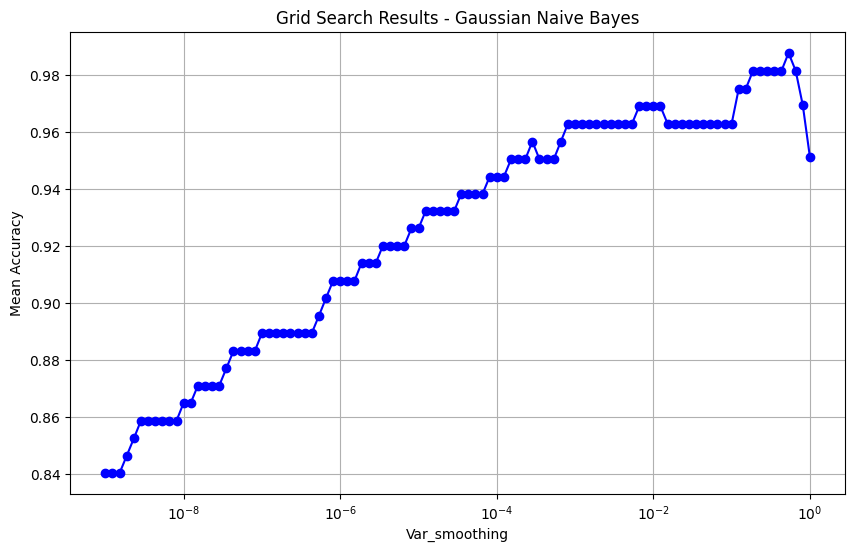

In [97]:
best_model_nb = train_and_log_model_nb(X_train, y_train)


Com o GridSearch obtivemos a melhor acurácia, os melhores parâmetros para o modelo e o gráfico que permite a visualização da performance da combinação dos parâmetros. Vemos que o modelo consegue melhorar a acurácia com o aumento dos valores de Var Smoothing, até que ele chega em um valor que não consegue mais subir e a acurácia passa a decair.

In [98]:
# Previsão com os dados de teste
predicted_classes_nb = best_model_nb.predict(X_test)

# Avaliação das métricas
accuracy_nb, precision_nb, recall_nb, f1_nb = eval_metrics(y_test, predicted_classes_nb)

# Impressão das métricas e melhores parâmetros para Naive Bayes Gaussiano
print(f"Gaussian Naive Bayes (var_smoothing={best_model_nb.named_steps['gaussiannb'].var_smoothing}):")
print(f"  Accuracy: {accuracy_nb}")
print(f"  Precision: {precision_nb}")
print(f"  Recall: {recall_nb}")
print(f"  F1 Score: {f1_nb}")

Gaussian Naive Bayes (var_smoothing=0.533669923120631):
  Accuracy: 0.97
  Precision: 0.9717647058823529
  Recall: 0.97
  F1 Score: 0.9694080338266384


Esses são os resultados da aplicação dos melhores parâmetros na etapa de teste. Vemos que o modelo se comportou bem, com alta generalização do conjunto de dados fora do treinamento.

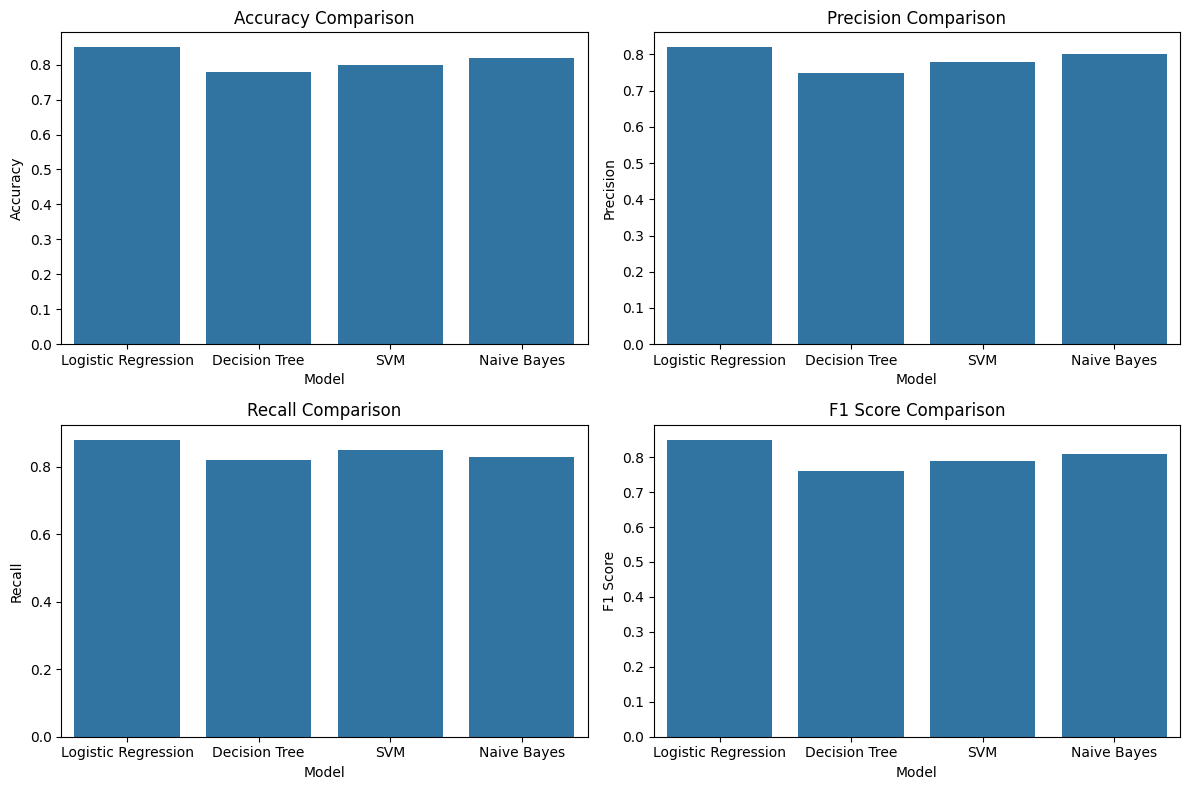

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exemplo fictício de DataFrame com métricas
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'Naive Bayes'],
    'Accuracy': [0.85, 0.78, 0.80, 0.82],
    'Precision': [0.82, 0.75, 0.78, 0.80],
    'Recall': [0.88, 0.82, 0.85, 0.83],
    'F1 Score': [0.85, 0.76, 0.79, 0.81]
}

metrics_df = pd.DataFrame(metrics_data)

# Visualização dos resultados usando gráfico de barras
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision Comparison')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall Comparison')

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()


Para fins de comparação geral, temos gráficos de cada uma das métricas usadas nos treinamentos e com isso podemos notar que todos os modelos se comportaram bem, mas que o modelo de Regressão Logística teve o melhor dos desempenhos.

# Diagnóstico do Melhor Modelo e Melhora

Agora vamos melhorar o Modelo de Regressão Logística.

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

Vamos configurar um pipeline que inclui a mudança de alguns parâmetros usados, a fim de evitar overfitting do modelo, que pode ter sido causado pelo uso de um conjunto de dados relativamente pequeno.

In [104]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=0.1, random_state=42))
])


Agora, vamos aplicar a validação cruzada k-fold para avaliar o desempenho do modelo.

In [105]:
num_folds = 5

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=num_folds, scoring='r2')

In [106]:
# Ajustando o modelo aos dados de treinamento completos
pipeline.fit(X_train, y_train)

# Avaliando o modelo nos dados de teste
test_score = pipeline.score(X_test, y_test)

print(f"Score médio de validação cruzada (R^2): {np.mean(cv_scores):.2f}")
print(f"Score no conjunto de teste (R^2): {test_score:.2f}")


Score médio de validação cruzada (R^2): 0.97
Score no conjunto de teste (R^2): 0.97


Com os ajustes, conseguimos manter uma alta acurácia e temos uma maior chance de que o modelo performe ainda melhor com dados ainda desconhecidos.